## Tool used for creating the unit test data. When evaluating the NINCO OOD unit tests, we recommend using the provided, pre-generated files for exact reproducibility.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import noise_functions

In [3]:
import data.paths_config

In [4]:
import numpy as np
import os
import sys
import torchvision
from PIL import Image
import skimage

In [5]:
import csv
import shutil

In [6]:
imagenet_val = torchvision.datasets.ImageNet(data.paths_config.dset_location_dict['ImageNet1K'], split='val', transform=None)
imagenet_val.__name__ = 'imagenet_val'

In [7]:
uni = noise_functions.get_uniform_noise()
low_freq = noise_functions.get_low_freq_uni_fullscale_noise() #kwargs_dict_noise_filter = {'srange': [80,80]}
low_freq_channelfullscale = noise_functions.get_low_freq_uni_channelfullscale_noise() #kwargs_dict_noise_filter = {'srange': [80,80]}
low_freq_colorrange = noise_functions.get_low_freq_uni_colorrange_noise() #kwargs_dict_noise_filter = {'srange': [80,80]}, kwargs_dict_scaling={'color_center': (.1, .5, .8), 'color_deviation': .3}
pixel_perm = noise_functions.get_pixel_permutation_noise()
low_freq_pixel_perm = noise_functions.get_low_freq_pixel_permutation_noise()
rademacher = noise_functions.get_rademacher_noise()
monochrome = noise_functions.get_monochrome()
black = noise_functions.get_black()
white = noise_functions.get_white()
blobs = noise_functions.get_blobs()
gaussian = noise_functions.get_gaussian()
stripes = noise_functions.get_stripes()

Example generation of 'low_freq_pixel_perm':

sigma = 1.0, i = 16947


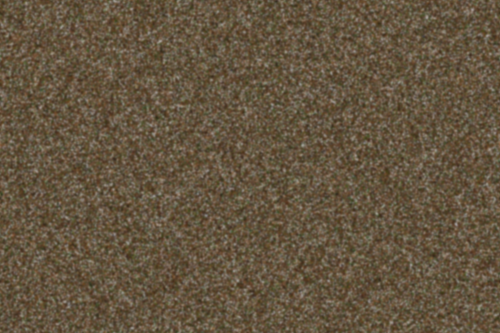

In [8]:
sigma = np.random.choice([1, 1.5, 2, 3, 4, 6, 8])
i = np.random.randint(len(imagenet_val))
print(f'sigma = {sigma}, i = {i}')

noisy_image = Image.fromarray((low_freq_pixel_perm(imagenet_val[i],
                               kwargs_dict_noise_filter = {'srange': [sigma,sigma]}        
                                       )[0]*255).astype('uint8'), mode='RGB')
display(noisy_image)
#display(imagenet_val[i][0])

### Set the noise name here

In [9]:
noise_name = 'vertical_stripes'

In [10]:
# for each noise, we modify a random (but seeded) set of ImageNet images
seed = int(''.join([str(ord(c)) for c in noise_name]))
rs = np.random.RandomState(np.random.MT19937(np.random.SeedSequence(seed)))
imagenet_val_indices = np.sort(rs.choice(len(imagenet_val), 400, replace=False))
print(np.sum(imagenet_val_indices))

10139895


In [11]:
new_data_path = None

In [ ]:
noise_dir = os.path.join(new_data_path, noise_name)
if os.path.exists(noise_dir):
    old_files_dir = os.path.join(repo_path, 'new_datasets/data/ood_unit_test_images/old', noise_name)
    if os.path.exists(old_files_dir): #careful, removes old backups and only keeps one
        shutil.rmtree(old_files_dir)
    shutil.move(noise_dir, old_files_dir)
os.makedirs(noise_dir)
print(f'Creating {noise_name} in {noise_dir}...')

for i in imagenet_val_indices:
    if noise_name=='Rademacher':
        noisy_image = Image.fromarray((rademacher(imagenet_val[i])[0]*255).astype('uint8'), mode='RGB')
    elif noise_name=='uni':
        noisy_image = Image.fromarray((uni(imagenet_val[i],
                                               )[0]*255).astype('uint8'), mode='RGB')
    elif noise_name=='low_freq':
        sigma = np.random.choice([10, 15, 25, 40, 60, 85])
        noisy_image = Image.fromarray((low_freq(imagenet_val[i],
                                       kwargs_dict_noise_filter = {'srange': [sigma,sigma]}        
                                               )[0]*255).astype('uint8'), mode='RGB')
    elif noise_name=='low_freq_channelfullscale':
        sigma = np.random.choice([10, 15, 25, 40, 60, 85])
        noisy_image = Image.fromarray((low_freq_channelfullscale(imagenet_val[i],
                                       kwargs_dict_noise_filter = {'srange': [sigma,sigma]}        
                                               )[0]*255).astype('uint8'), mode='RGB')
    elif noise_name=='low_freq_colorrange':
        sigma = np.random.choice([10, 15, 25, 40, 60, 85])
        color_center = np.random.uniform(low=0.0, high=1., size=(3,))
        color_deviation = np.random.uniform(low=0.1, high=0.3)
        noisy_image = Image.fromarray((low_freq_colorrange(imagenet_val[i],
                                       kwargs_dict_noise_filter = {'srange': [sigma,sigma]},
                                       kwargs_dict_scaling={'color_center': color_center, 'color_deviation': color_deviation}
                                               )[0]*255).astype('uint8'), mode='RGB')
    elif noise_name=='pixel_perm':
        noisy_image = Image.fromarray((pixel_perm(imagenet_val[i],
                                               )[0]*255).astype('uint8'), mode='RGB')
    elif noise_name=='low_freq_pixel_perm':
        sigma = np.random.choice([1, 1.5, 2, 3, 4, 6, 8])
        noisy_image = Image.fromarray((low_freq_pixel_perm(imagenet_val[i],
                                       kwargs_dict_noise_filter = {'srange': [sigma,sigma]}        
                                               )[0]*255).astype('uint8'), mode='RGB')
    elif noise_name=='monochrome':
        color = np.random.uniform(low=0.0, high=1., size=(3,))
        noisy_image = Image.fromarray((monochrome(imagenet_val[i],
                                       kwargs_dict_base_noise= {'color': color}
                                               )[0]*255).astype('uint8'), mode='RGB')
    elif noise_name=='grey':
        color = np.random.uniform(low=0.0, high=1., size=(1,))
        noisy_image = Image.fromarray((monochrome(imagenet_val[i],
                                       kwargs_dict_base_noise= {'color': color}
                                               )[0]*255).astype('uint8'), mode='RGB')
    elif noise_name=='black':
        noisy_image = Image.fromarray((black(imagenet_val[i],
                                               )[0]*255).astype('uint8'), mode='RGB')
    elif noise_name=='white':
        noisy_image = Image.fromarray((white(imagenet_val[i],
                                               )[0]*255).astype('uint8'), mode='RGB')
    elif noise_name=='blobs':
        sigma = np.random.choice([1.5, 2, 2.5, 3, 3.5, 4])
        noisy_image = Image.fromarray((blobs(imagenet_val[i],
                                       kwargs_dict_base_noise={'p': .7},
                                       kwargs_dict_noise_filter = {'srange': [sigma,sigma]},
                                       kwargs_dict_scaling = {'lower': .75, 'upper': 1.0}       
                                               )[0]*255).astype('uint8'), mode='RGB')
    elif noise_name=='Gaussian':
        sigma = np.random.choice([.05, .075, .1, .15, .2, .3, .5])
        noisy_image = Image.fromarray((gaussian(imagenet_val[i],
                                         kwargs_dict_base_noise= {'sigma': sigma} 
                                               )[0]*255).astype('uint8'), mode='RGB')
    elif noise_name=='tricolour':
        orientations = ['horizontal', 'vertical']
        orientation_index = np.random.choice([0,1])
        orientation = orientations[orientation_index]
        color_list = np.random.uniform(low=0.0, high=1., size=(3,3))
        noisy_image = Image.fromarray((stripes(imagenet_val[i],
                                         kwargs_dict_base_noise= {'orientation': orientation, 'color_list': color_list} 
                                               )[0]*255).astype('uint8'), mode='RGB')
    elif noise_name=='tricolour_primary':
        orientations = ['horizontal', 'vertical']
        orientation_index = np.random.choice([0,1])
        orientation = orientations[orientation_index]
        color_list = np.random.binomial(n=1, p=.5, size=(3,3))
        noisy_image = Image.fromarray((stripes(imagenet_val[i],
                                         kwargs_dict_base_noise= {'orientation': orientation, 'color_list': color_list} 
                                               )[0]*255).astype('uint8'), mode='RGB')
    elif noise_name=='horizontal_stripes':
        orientation = 'horizontal'
        n_stripes = np.random.choice([4, 5, 7, 10, 15, 20])
        color_list = np.random.uniform(low=0.0, high=1., size=(n_stripes,3))
        noisy_image = Image.fromarray((stripes(imagenet_val[i],
                                         kwargs_dict_base_noise= {'orientation': orientation, 'color_list': color_list} 
                                               )[0]*255).astype('uint8'), mode='RGB')
    elif noise_name=='vertical_stripes':
        orientation = 'vertical'
        n_stripes = np.random.choice([4, 5, 7, 10, 15, 20])
        color_list = np.random.uniform(low=0.0, high=1., size=(n_stripes,3))
        noisy_image = Image.fromarray((stripes(imagenet_val[i],
                                         kwargs_dict_base_noise= {'orientation': orientation, 'color_list': color_list} 
                                               )[0]*255).astype('uint8'), mode='RGB')
    else: 
        raise NotImplementedError
    if i%2 == 0:
        image_format_extension = 'png'
    else:
        image_format_extension = 'jpg'
    image_save_fn = f'{noise_name}_{i:05d}.{image_format_extension}'
    image_save_filename = os.path.join(noise_dir, image_save_fn)
    noisy_image.save(image_save_filename)
    
print(f'{len(os.listdir(noise_dir))} samples of {noise_name} created in {noise_dir}.')